<Axes: xlabel='shared_request_flag'>

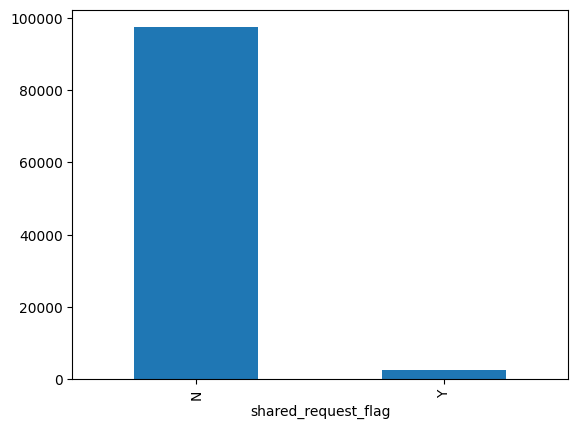

In [2]:
# Import the various modules we need
import pandas as pd
from pyarrow.parquet import ParquetFile
import pyarrow as pa
import numpy as np

# Number of rows to read from the parquet file
rows_to_read = 100000
# The file name to read
parquet_file_name = "fhvhv_tripdata_2023-01.parquet"
# Set up a pointer to the Parquet file
pf = ParquetFile(parquet_file_name)
# Take a subset of the rows from the file
rows_subset = next(pf.iter_batches(batch_size = rows_to_read))
# Convert data to a Pandas dataframe
df = pa.Table.from_batches([rows_subset]).to_pandas()

df['shared_request_flag'].value_counts().plot(kind='bar')

<Axes: xlabel='shared_match_flag'>

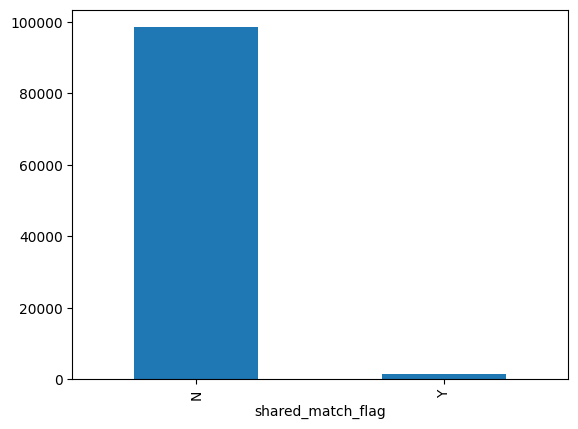

In [3]:
df['shared_match_flag'].value_counts().plot(kind='bar')

<Axes: xlabel='access_a_ride_flag'>

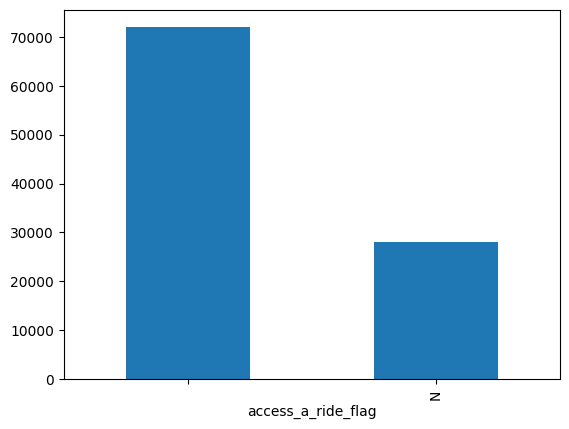

In [19]:
df['access_a_ride_flag'].value_counts().plot(kind='bar')

In [22]:
# df['access_a_ride_flag'].str.replace(" ", "N/A")
df['access_a_ride_flag'].str.strip(" ")
df['access_a_ride_flag'] == " "

0         True
1         True
2         True
3         True
4         True
         ...  
99995     True
99996     True
99997    False
99998    False
99999    False
Name: access_a_ride_flag, Length: 100000, dtype: bool

<Axes: xlabel='wav_request_flag'>

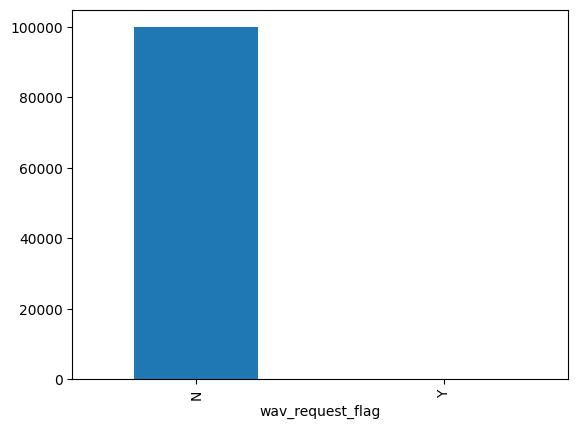

In [23]:
df['wav_request_flag'].value_counts().plot(kind='bar')

<Axes: xlabel='wav_match_flag'>

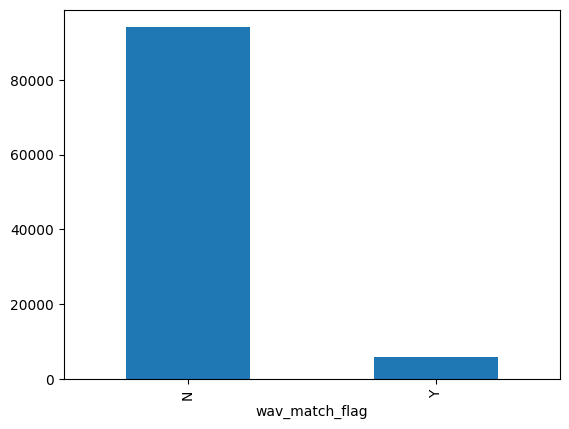

In [28]:
df['wav_match_flag'].value_counts().plot(kind='bar')

In [30]:
print(df.groupby('wav_match_flag').apply(len))

wav_match_flag
N    94016
Y     5984
dtype: int64


In [31]:
print(df.groupby('shared_request_flag').apply(len))

shared_request_flag
N    97438
Y     2562
dtype: int64


In [32]:
print(df.groupby('shared_match_flag').apply(len))

shared_match_flag
N    98499
Y     1501
dtype: int64


In [33]:
print(df.groupby('wav_request_flag').apply(len))

wav_request_flag
N    99949
Y       51
dtype: int64


In [58]:
print(df.groupby('access_a_ride_flag').apply(len))

access_a_ride_flag
     71947
N    28053
dtype: int64


In [71]:
df['access_a_ride_flag'].str.replace(" ", "Y")

0        Y
1        Y
2        Y
3        Y
4        Y
        ..
99995    Y
99996    Y
99997    N
99998    N
99999    N
Name: access_a_ride_flag, Length: 100000, dtype: object

In [47]:
print(df.groupby('hvfhs_license_num').apply(len))

hvfhs_license_num
HV0003    71947
HV0005    28053
dtype: int64


In [48]:
print(df.groupby('dispatching_base_num').apply(len))

dispatching_base_num
B02764       16
B02870        7
B02872        3
B03404    71921
B03406    28053
dtype: int64


In [49]:
print(df.groupby('originating_base_num').apply(len))

originating_base_num
B02764       16
B02870        7
B02872        3
B03404    71921
B03406       23
dtype: int64


In [62]:
# df["request_datetime"] = pd.to_datetime(df["request_datetime"], format="%Y-%m-%d %H:%M:%S.%f")
pd.options.display.float_format = '{:.2f}'.format
print(df[['trip_miles','trip_time','base_passenger_fare','tolls','bcf','sales_tax','congestion_surcharge','airport_fee','tips','driver_pay']].describe())

       trip_miles  trip_time  base_passenger_fare     tolls       bcf  \
count   100000.00  100000.00            100000.00 100000.00 100000.00   
mean         4.81    1055.12                34.99      1.05      1.07   
std          5.01     665.12                24.87      3.93      0.78   
min          0.00       1.00               -36.76      0.00      0.00   
25%          1.71     581.00                18.59      0.00      0.56   
50%          3.21     900.00                28.80      0.00      0.88   
75%          6.03    1363.00                44.20      0.00      1.36   
max        112.87   12085.00               441.36     65.20     15.44   

       sales_tax  congestion_surcharge  airport_fee      tips  driver_pay  
count  100000.00             100000.00    100000.00 100000.00   100000.00  
mean        2.92                  1.06         0.02      1.26       25.41  
std         2.04                  1.33         0.23      3.64       15.35  
min         0.00                  0.00

In [42]:
df.duplicated().sum().sum()

0

NameError: name 'plt' is not defined

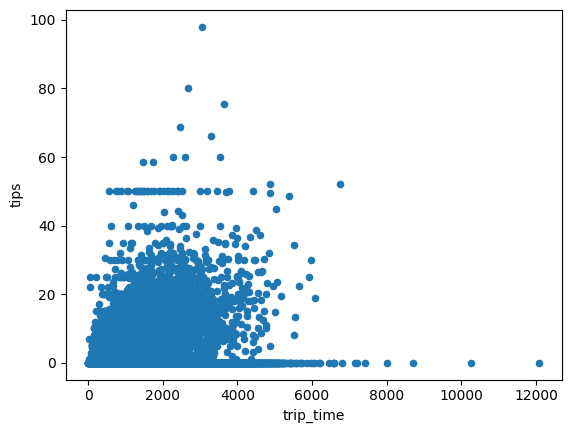

In [44]:
df.plot(kind='scatter', x='trip_time', y='tips')

plt.show()

NameError: name 'plt' is not defined

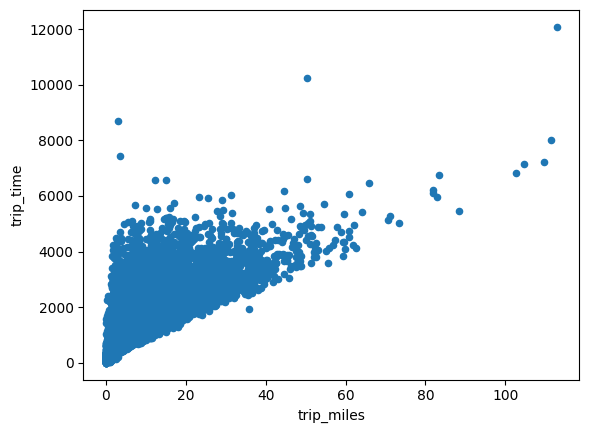

In [46]:
df.plot(kind='scatter', x='trip_miles', y='trip_time')
plt.show()

<Axes: xlabel='hvfhs_license_num'>

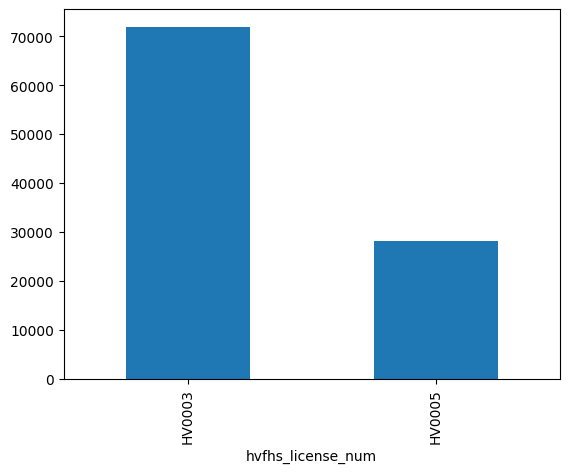

In [59]:
df['hvfhs_license_num'].value_counts().plot(kind='bar')

<Axes: xlabel='dispatching_base_num'>

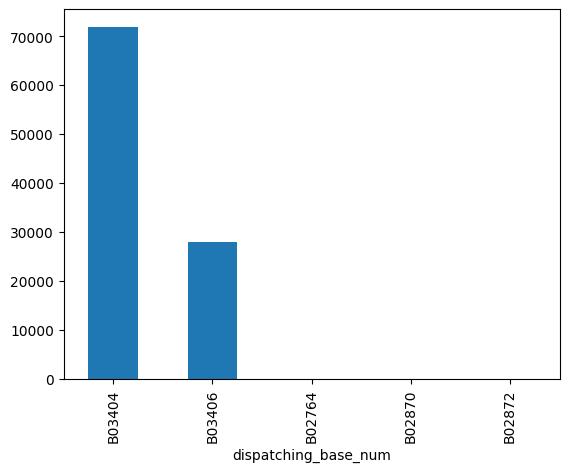

In [60]:
df['dispatching_base_num'].value_counts().plot(kind='bar')

<Axes: xlabel='originating_base_num'>

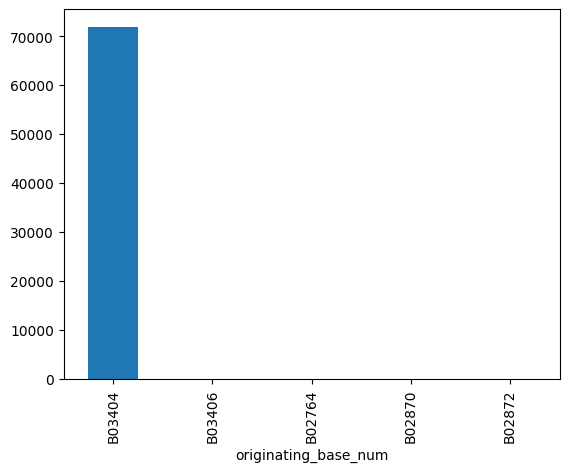

In [61]:
df['originating_base_num'].value_counts().plot(kind='bar')

In [64]:
print(df.groupby('PULocationID').apply(len))

PULocationID
2        1
3      140
4      384
5       42
6       36
      ... 
260    544
261    222
262    397
263    702
265      3
Length: 256, dtype: int64


In [2]:
# Import the various modules we need
import pandas as pd
from pyarrow.parquet import ParquetFile
import pyarrow as pa
import numpy as np

# Number of rows to read from the parquet file
rows_to_read = 100000
# The file name to read
parquet_file_name = "fhvhv_tripdata_2023-01.parquet"
# Set up a pointer to the Parquet file
pf = ParquetFile(parquet_file_name)
# Take a subset of the rows from the file
rows_subset = next(pf.iter_batches(batch_size = rows_to_read))
# Convert data to a Pandas dataframe
df = pa.Table.from_batches([rows_subset]).to_pandas()

print("Rows with null values:", df.isnull().any(axis=1).sum())

Rows with null values: 28030


In [3]:
# Import the various modules we need
import pandas as pd
from pyarrow.parquet import ParquetFile
import pyarrow as pa
import numpy as np

taxi_zone_lookup = pd.read_csv('taxi+_zone_lookup.csv')
print(taxi_zone_lookup.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LocationID    265 non-null    int64 
 1   Borough       265 non-null    object
 2   Zone          264 non-null    object
 3   service_zone  263 non-null    object
dtypes: int64(1), object(3)
memory usage: 8.4+ KB
None


In [5]:
for idx in taxi_zone_lookup.Zone.value_counts().index.to_list():
    if idx.find('Airport')!=-1:
        print(idx)

Newark Airport
LaGuardia Airport
JFK Airport


In [6]:
taxi_zone_lookup[taxi_zone_lookup.Zone.isin(['Newark Airport','LaGuardia Airport','JFK Airport'])] # airport_fee has sth to do with location ID 1,132,138

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
131,132,Queens,JFK Airport,Airports
137,138,Queens,LaGuardia Airport,Airports
